<a href="https://colab.research.google.com/github/bankadilasha11/MACHINE-LEARNING/blob/master/fake_or_real_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import HashingVectorizer
import itertools
import numpy as np

In [22]:
df = pd.read_csv("fake_or_real_news.csv")

In [23]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [24]:
df.shape

(6335, 4)

In [25]:
df = df.set_index("Unnamed: 0")

In [26]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [27]:
y=df.label

In [28]:
df.drop("label", axis=1)      #where numbering of news article is done that column is dropped in dataset

,title,text
Unnamed: 0,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...
4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [30]:
count_vectorizer = CountVectorizer(stop_words='english')

In [33]:
count_train = count_vectorizer.fit_transform(X_train)                  # Learn the vocabulary dictionary and return term-document matrix.

In [32]:
count_test = count_vectorizer.transform(X_test)

In [34]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)    # This removes words which appear in more than 70% of the articles


In [37]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

In [36]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [41]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [42]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [44]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [45]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [47]:
difference = set(count_df.columns) - set(tfidf_df.columns)

In [49]:
difference

set()

In [50]:
print(count_df.equals(tfidf_df))

False


In [51]:
print(count_df.head())

   00  000  0000  00000031  000035  00006  ...  ما  محاولات  من  هذا  والمرضى  ยงade
0   0    0     0         0       0      0  ...   0        0   0    0        0      0
1   0    0     0         0       0      0  ...   0        0   0    0        0      0
2   0    0     0         0       0      0  ...   0        0   0    0        0      0
3   0    0     0         0       0      0  ...   0        0   0    0        0      0
4   0    0     0         0       0      0  ...   0        0   0    0        0      0

[5 rows x 56922 columns]


In [52]:
print(tfidf_df.head())

    00  000  0000  00000031  000035  ...  محاولات   من  هذا  والمرضى  ยงade
0  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
1  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
2  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
3  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
4  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0

[5 rows x 56922 columns]


In [53]:
# Function to plot the confusion matrix 
#--------------------------------------------------------------

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


accuracy:   0.857
Confusion matrix, without normalization
[[ 739  269]
 [  31 1052]]
accuracy:   0.893
Confusion matrix, without normalization
[[ 865  143]
 [  80 1003]]


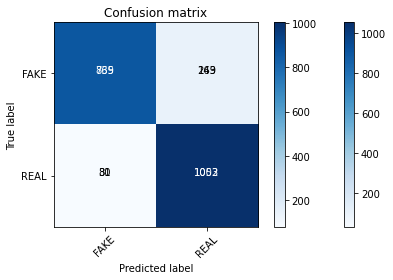

In [54]:
# Naive Bayes classifier for Multinomial model 
#--------------------------------------------------------------

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)                       # Fit Naive Bayes classifier according to X, y

pred = clf.predict(tfidf_test)                     # Perform classification on an array of test vectors X.
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)


clf = MultinomialNB()

clf.fit(count_train, y_train)

pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

accuracy:   0.934
Confusion matrix, without normalization
[[ 952   56]
 [  81 1002]]


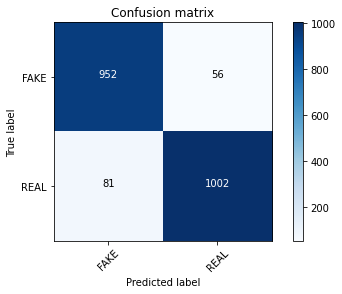

In [69]:
#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------

linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

In [70]:
clf = MultinomialNB(alpha=0.1)               # Additive (Laplace/Lidstone) smoothing parameter

In [71]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [72]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):       # inspect the top 30 vectors for fake and real news
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()                                            # Array mapping from feature integer indices to feature name
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)
most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)
feature_names = tfidf_vectorizer.get_feature_names()

### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]                               # clearly there are certain words which might show political intent and source in the top fake features (such as the words corporate and establishment).

tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
#print(tokens_with_weights)

FAKE -4.9429467634069795 2016
FAKE -4.107571533652512 hillary
FAKE -4.03437242789946 october
FAKE -3.1845797772218982 share
FAKE -3.049134538387495 november
FAKE -2.928033913167468 article
FAKE -2.6539874834484443 print
FAKE -2.404791939976435 oct
FAKE -2.222993535791876 advertisement
FAKE -2.182390329965931 email
FAKE -2.0692180559172315 mosul
FAKE -2.0610649399041137 election
FAKE -2.0554775115839212 establishment
FAKE -2.0541839208011625 source
FAKE -2.0297106422918856 war
FAKE -1.9903869002398822 podesta
FAKE -1.977709083657733 snip
FAKE -1.9066436202664492 wikileaks
FAKE -1.8818349565072352 nov
FAKE -1.8814212059186184 com
FAKE -1.8059973141749661 donald
FAKE -1.8040866622384741 26
FAKE -1.7983650447562773 pipeline
FAKE -1.7956831700861484 dr
FAKE -1.7735426773233918 jewish
FAKE -1.7442880990661098 corporate
FAKE -1.6450569705124423 ayotte
FAKE -1.6449016737712836 youtube
FAKE -1.6030022955020178 uk
FAKE -1.596117442068524 entire

REAL 4.734670620752771 said
REAL 2.786869368013981

accuracy:   0.921
Confusion matrix, without normalization
[[934  74]
 [ 91 992]]


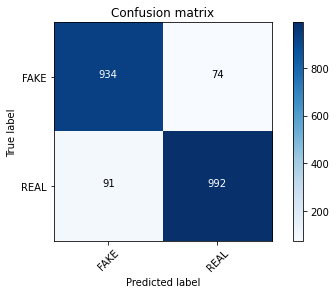

In [78]:
#--------------------------------------------------------------
# Applying Passive Aggressive Classifier
#--------------------------------------------------------------

clf = PassiveAggressiveClassifier(n_iter_no_change=50)    

clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)